In [1]:
import numpy as np
import argparse
import os, time

from pykin.utils import plot_utils as p_utils

from pytamp.benchmark import Benchmark2_for_rearr as Benchmark2
from pytamp.search.mcts_for_rearragement import MCTS_rearrangement
from pytamp.utils import point_cloud_utils as pc_utils

def get_parser():
    # ? python3 benchmark2_test.py --budgets 100 --max_depth 14 --seed 1 --algo bai_perturb
    parser = argparse.ArgumentParser(description="Test Benchmark 2.")
    parser.add_argument("--budgets", metavar="T", type=int, default=100, help="Horizon")
    parser.add_argument("--max_depth", metavar="H", type=int, default=14, help="Max depth")
    parser.add_argument("--seed", metavar="i", type=int, default=14, help="A random seed")
    parser.add_argument(
        "--algo",
        metavar="alg",
        type=str,
        default="bai_perturb",
        choices=["bai_perturb", "bai_ucb", "uct", "random", "greedy"],
        help="Choose one (bai_perturb, bai_ucb, uct)",
    )
    parser.add_argument(
        "--debug_mode",
        default=False,
        type=lambda x: (str(x).lower() == "true"),
        help="Debug mode",
    )
    parser.add_argument(
        "--bottle_number",
        metavar="N",
        type=int,
        default=3,
        help="Bottle Number(6 or less.)",
    )
#     parser.add_argument("--box_number", metavar="N", type=int, default=6, help="Box Number(6 or less)")
    try:
        args = parser.parse_args() #call from command line
    except:
        args = parser.parse_args(args=[]) #call from notebook
    return args 

args = get_parser() 

debug_mode = args.debug_mode
# debug_mode = True
budgets = args.budgets
max_depth = args.max_depth
algo = args.algo
seed = args.seed
np.random.seed(seed)

benchmark2 = Benchmark2('doosan', is_pyplot=False, geom='visual' ,bottle_num=args.bottle_number)

final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []

# final_optimal_trees = []
c_list = 10 ** np.linspace(-2, 2.0, 10)


2023-08-07 03:54:44.372342: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
usage: ipykernel_launcher.py [-h] [--budgets T] [--max_depth H] [--seed i]
                             [--algo alg] [--debug_mode DEBUG_MODE]
                             [--bottle_number N]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/juju/.local/share/jupyter/runtime/kernel-50a9071c-9ebe-4169-a47f-6935f23f734f.json


specific sup name : shelves {'shelves': <trimesh.Trimesh(vertices.shape=(1083, 3), faces.shape=(2162, 3))>}
shelves
specific sup name : shelves {'shelves': <trimesh.Trimesh(vertices.shape=(1083, 3), faces.shape=(2162, 3))>}
shelves
specific sup name : shelves {'shelves': <trimesh.Trimesh(vertices.shape=(1083, 3), faces.shape=(2162, 3))>}
shelves
*********************** Logical States ***********************
OrderedDict([('bottle_0',
              {'on': Object(name=shelves, pos=[0.6 1.4 1.1])}),
             ('bottle_1',
              {'on': Object(name=shelves, pos=[0.6 1.4 1.1])}),
             ('goal_bottle',
              {'on': Object(name=shelves, pos=[0.6 1.4 1.1])}),
             ('shelves',
              {'static': True,
               'support': [Object(name=bottle_0, pos=[ 0.88199158 -0.12657169  1.48561214]),
                           Object(name=bottle_1, pos=[ 0.75448566 -0.18137433  1.48561202]),
                           Object(name=goal_bottle, pos=[ 0.7055441  -0.00

In [2]:
# # in pc_utils
# pc, pc_segments, pc_color, count = pc_utils.get_obj_point_clouds(
#                             benchmark2.init_scene,
#                             mcts.rearr_action.scene_mngr.scene,
#                             mcts.tree.nodes[0]
#                             )

# table_point_cloud, table_color =  pc_utils.get_support_space_point_cloud(benchmark2.init_scene, benchmark2.scene_mngr.scene)

# # in pc_utils
# all_pc = np.vstack([pc, table_point_cloud])
# all_color = np.vstack([pc_color, table_color])

# # fig, ax = p_utils.init_3d_figure(name="Level wise 1")
# # mcts.rearr_action.scene_mngr.render_objects(ax)
# # p_utils.plot_basis(ax)
# # mcts.rearr_action.show()

# mcts.rearr_action.scene_mngr.scene.objs


# ##### %matplotlib inline
# import trimesh
# from trimesh.util import concatenate

# # table_point_cloud =  pc_utils.get_support_space_point_cloud(rearrangement1.init_scene, rearrangement1.scene_mngr.scene)
# # all_pc = np.vstack([combined_pc, table_point_cloud])

# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# # print(obj_to_manipulate)
# # print(mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name'])

# #################### 
# # 포인트 클라우드를 렌더링
# colors = np.random.randint(0, 255, (1, 3), dtype=np.uint8)  # RGB colors (0-255)
# pc_full = trimesh.points.PointCloud(all_pc,  colors=colors)
# scene = trimesh.Scene(pc_full)

# # Set point size and color
# scene.point_size = 5.0  # Increase point size to make them more visible

# # Show the scene
# scene.show()

In [3]:
# # # # #######################
# fig, ax = p_utils.init_3d_figure(name="Benchamrk 1")
# # init_scene

# benchmark2.scene_mngr.render_scene(ax)
# benchmark2.render_axis(benchmark2.scene_mngr)
# benchmark2.scene_mngr.render_axis(ax, benchmark2.scene_mngr.scene.robot.gripper.get_gripper_pose())
# benchmark2.scene_mngr.show()


In [4]:
benchmark2.scene_mngr.scene.objs, benchmark2.scene_mngr.scene.logical_states

({'shelves': Object(name=shelves, pos=[0.6 1.4 1.1]),
  'bottle_0': Object(name=bottle_0, pos=[ 0.88199158 -0.12657169  1.48561214]),
  'bottle_1': Object(name=bottle_1, pos=[ 0.75448566 -0.18137433  1.48561202]),
  'goal_bottle': Object(name=goal_bottle, pos=[ 0.7055441  -0.00264114  1.48560468]),
  'trash_bin': Object(name=trash_bin, pos=[-0.4   0.55  0.  ]),
  'rect_box': Object(name=rect_box, pos=[0.82  0.5   0.615])},
 OrderedDict([('bottle_0',
               {'on': Object(name=shelves, pos=[0.6 1.4 1.1])}),
              ('bottle_1',
               {'on': Object(name=shelves, pos=[0.6 1.4 1.1])}),
              ('goal_bottle',
               {'on': Object(name=shelves, pos=[0.6 1.4 1.1])}),
              ('shelves',
               {'static': True,
                'support': [Object(name=bottle_0, pos=[ 0.88199158 -0.12657169  1.48561214]),
                 Object(name=bottle_1, pos=[ 0.75448566 -0.18137433  1.48561202]),
                 Object(name=goal_bottle, pos=[ 0.7055441  

In [5]:
c = 5
idx = 0
mcts = MCTS_rearrangement(
    scene_mngr=benchmark2.scene_mngr,
    init_scene=benchmark2.init_scene,
    sampling_method=algo,
    budgets=budgets,
    max_depth=max_depth,
    c=c,
    debug_mode=True,
    use_pick_action=False,
    consider_next_scene=False, 
    grasp_use_num = 3, 
)

mcts.only_optimize_1 = False 

2023-08-07 03:54:45.741638: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-08-07 03:54:45.761134: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-07 03:54:45.761197: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3080 computeCapability: 8.6
coreClock: 1.74GHz coreCount: 68 deviceMemorySize: 9.77GiB deviceMemoryBandwidth: 707.88GiB/s
2023-08-07 03:54:45.761213: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-08-07 03:54:45.762592: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-08-07 03:54:45.762634: I tensorflow/stream_executor/plat

/home/juju/contact_graspnet/pointnet2/tf_ops/sampling
<module 'contact_graspnet.contact_graspnet' from '/home/juju/contact_graspnet/contact_graspnet/contact_graspnet.py'>
--- Get model
Instructions for updating:
Colocations handled automatically by placer.


/home/juju/contact_graspnet/contact_graspnet/config_utils.py:42: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  global_config = yaml.load(f)
/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/legacy_tf_layers/normalization.py:307: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  warnings.warn(
/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1692: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` i

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2023-08-07 03:54:47.853382: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-07 03:54:47.854557: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-07 03:54:47.854660: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3080 computeCapability: 8.6
coreClock: 1.74GHz coreCount: 68 deviceMemorySize: 9.77GiB deviceMemoryBandwidth: 707.88GiB/s
2023-08-07 03:54:47.854706: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), 

INFO:tensorflow:Restoring parameters from /home/juju/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-144144


2023-08-07 03:54:48.115305: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-08-07 03:54:48.115324: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1264]      0 
2023-08-07 03:54:48.115328: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1277] 0:   N 
2023-08-07 03:54:48.115475: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-07 03:54:48.115560: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-07 03:54:48.115611: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-

In [6]:
start_time = time.time()
for i in range(budgets):
# for i in range(10):
    print(
        f"\n[{idx+1}/{len(c_list)}] Benchmark: {benchmark2.scene_mngr.scene.bench_num}, Algo: {algo}, C: {c}, Seed: {seed}"
    )
    mcts.do_planning_rearrange(i)

    print("########### Running time : ", time.time()- start_time, "##############")
    final_level_1_values.append(mcts.values_for_level_1)



[1/10] Benchmark: 2, Algo: bai_perturb, C: 5, Seed: 14
=========== Search iteration : 1 ===========
specific sup name : shelves {'shelves': <trimesh.Trimesh(vertices.shape=(1083, 3), faces.shape=(2162, 3))>}
shelves
specific sup name : shelves {'shelves': <trimesh.Trimesh(vertices.shape=(1083, 3), faces.shape=(2162, 3))>}
shelves
[Action] Rearr bottle_1 to shelves
[Reward] S(0) -> A(2) -> S'(4) Reward : -0.5
specific sup name : shelves {'shelves': <trimesh.Trimesh(vertices.shape=(1083, 3), faces.shape=(2162, 3))>}
shelves
[Action] Rearr bottle_0 to shelves
[Reward] S(4) -> A(5) -> S'(7) Reward : -0.5
specific sup name : shelves {'shelves': <trimesh.Trimesh(vertices.shape=(1083, 3), faces.shape=(2162, 3))>}
shelves
[Action] Rearr goal_bottle to trash_bin
[Reward] S(7) -> A(9) -> S'(10) Reward : -0.5
Success!!!!!
Terminal State! Reward is 5
bottle_1
Extracted Region Cube Size:  0.6


2023-08-07 03:54:48.930835: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-08-07 03:54:49.277018: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-08-07 03:54:49.813071: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-08-07 03:54:50.097469: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


Generated 31 grasps for object bottle_1
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (186, 4, 4)
Collision free grasps step 3 :  (13, 4, 4)
solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0069 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0023 sec

solve with LM1
Iterators : 6
WorkingTime[inverse_kinematics]: 0.0027 sec

bottle_0
Extracted Region Cube Size:  0.6
Generated 4 grasps for object bottle_0
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (24, 4, 4)
Collision free grasps step 3 :  (3, 4, 4)
solve with LM1
Iterators : 16
WorkingTime[inverse_kinematics]: 0.0066 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0023 sec

collision !!! 
solve with LM1
Iterators : 22
WorkingTime[inverse_kinematics]: 0.0088 sec

solve with LM1
Iterators : 6
WorkingTime[inverse_kinematics]: 0.0026 sec

solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0049 sec

goal_bottle
Extracted Region Cube Size:  0.6


[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000009


Generated 67 grasps for object goal_bottle
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (402, 4, 4)
Collision free grasps step 3 :  (69, 4, 4)
solve with LM1
Iterators : 22
WorkingTime[inverse_kinematics]: 0.0091 sec

solve with LM1
Iterators : 12
WorkingTime[inverse_kinematics]: 0.0052 sec

solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0059 sec

pick bottle_1
solve with LM1
Iterators : 15
WorkingTime[inverse_kinematics]: 0.0063 sec



[ERROR] [RRT Star Planner]: Failed Generate Path..
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000009


Retry Generate Path, the number of retries is 1/5 

solve with LM1
Iterators : 21
WorkingTime[inverse_kinematics]: 0.0086 sec



[INFO] [RRT Star Planner]: iter : 500
[ERROR] [RRT Star Planner]: Failed Generate Path..
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000008
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000009


Retry Generate Path, the number of retries is 2/5 

solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0060 sec

{('link2', 'shelves')}
*********************** Scene ***********************
{'bottle_0': Object(name=bottle_0, pos=[ 0.88199158 -0.12657169  1.48561214]),
 'bottle_1': Object(name=bottle_1, pos=[ 0.75448566 -0.18137433  1.48561202]),
 'goal_bottle': Object(name=goal_bottle, pos=[ 0.7055441  -0.00264114  1.48560468]),
 'rect_box': Object(name=rect_box, pos=[0.82  0.5   0.615]),
 'shelves': Object(name=shelves, pos=[0.6 1.4 1.1]),
 'trash_bin': Object(name=trash_bin, pos=[-0.4   0.55  0.  ])}
doosan Transform(pos=[0.    0.    0.913], rot=[1. 0. 0. 0.])
robotiq140_gripper [[ 0.09483723 -0.01795984  0.99533077  0.52053356]
 [-0.02382445 -0.99959182 -0.01576668 -0.17033385]
 [ 0.99520766 -0.02221794 -0.0952264   1.59033858]
 [ 0.          0.          0.          1.        ]]
***************************************************************

******************** Robot

[INFO] [RRT Star Planner]: iter : 500
[ERROR] [RRT Star Planner]: Failed Generate Path..
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000009
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000009


Retry Generate Path, the number of retries is 3/5 

solve with LM1
Iterators : 18
WorkingTime[inverse_kinematics]: 0.0076 sec

{('link2', 'shelves')}
*********************** Scene ***********************
{'bottle_0': Object(name=bottle_0, pos=[ 0.88199158 -0.12657169  1.48561214]),
 'bottle_1': Object(name=bottle_1, pos=[ 0.75448566 -0.18137433  1.48561202]),
 'goal_bottle': Object(name=goal_bottle, pos=[ 0.7055441  -0.00264114  1.48560468]),
 'rect_box': Object(name=rect_box, pos=[0.82  0.5   0.615]),
 'shelves': Object(name=shelves, pos=[0.6 1.4 1.1]),
 'trash_bin': Object(name=trash_bin, pos=[-0.4   0.55  0.  ])}
doosan Transform(pos=[0.    0.    0.913], rot=[1. 0. 0. 0.])
robotiq140_gripper [[ 0.09483728 -0.01795915  0.99533078  0.52053351]
 [-0.02382468 -0.99959183 -0.01576596 -0.17033391]
 [ 0.99520765 -0.02221823 -0.09522644  1.59033859]
 [ 0.          0.          0.          1.        ]]
***************************************************************

******************** Robot

[INFO] [RRT Star Planner]: iter : 500
[INFO] [RRT Star Planner]: iter : 1000
[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.578
WorkingTime[run]: 10.2680 sec

WorkingTime[run]: 0.0427 sec

WorkingTime[run]: 0.0420 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.754
WorkingTime[run]: 1.5079 sec

solve with LM1
Iterators : 86
WorkingTime[inverse_kinematics]: 0.0355 sec

solve with LM1
Iterators : 82
WorkingTime[inverse_kinematics]: 0.0333 sec

Retry compute IK.. Pose error is 0.376762 
solve with LM1
Iterators : 89
WorkingTime[inverse_kinematics]: 0.0357 sec

Retry compute IK.. Pose error is 0.376762 
solve with LM1
Iterators : 94
WorkingTime[inverse_kinematics]: 0.0375 sec

Retry compute IK.. Pose error is 0.376762 
solve with LM1
Iterators : 90
WorkingTime[inverse_kinematics]: 0.0360 sec

Retry compute IK.. Pose error is 0.376762 
solve with LM1
Iterators : 87
WorkingTime[inverse_kinematics]: 0.0358 sec

Retry compute IK.. Pose error is 0.376823 
solve with LM1
Iterators : 95
WorkingTime[inverse_kinematics]: 0.0387 sec

Retry compute IK.. Pose error is 0.376824 
solve with LM1
Iterators : 94
WorkingTime[inverse_kinematics]: 0.0383 sec

Retry compute IK.. Pose error is 0.376763 
solve with LM1
Iterators : 88
WorkingTime[inverse_kinem

[ERROR] [RRT Star Planner]: Not found IK solution


Iterators : 87
WorkingTime[inverse_kinematics]: 0.0357 sec

Retry compute IK.. Pose error is 0.376823 
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0399 sec

solve with LM1
Iterators : 85
WorkingTime[inverse_kinematics]: 0.0340 sec

Retry compute IK.. Pose error is 0.376762 
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0396 sec

Retry compute IK.. Pose error is 0.376824 
WorkingTime[run]: 1.9324 sec

Place joint Fail
[[0, 2, 4, 5, 7, 9, 10]]
 level 2 value : -inf 
Add level_1_node!
########### Running time :  16.86665439605713 ##############

[1/10] Benchmark: 2, Algo: bai_perturb, C: 5, Seed: 14
=========== Search iteration : 2 ===========
[Action] Rearr bottle_0 to shelves
[Reward] S(0) -> A(1) -> S'(11) Reward : -0.5
specific sup name : shelves {'shelves': <trimesh.Trimesh(vertices.shape=(1083, 3), faces.shape=(2162, 3))>}
shelves
[Action] Rearr goal_bottle to trash_bin
[Reward] S(11) -> A(13) -> S'(14) Reward : -0.5
Success!!!!!
Terminal St

[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000006


Generated 66 grasps for object goal_bottle
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (396, 4, 4)
Collision free grasps step 3 :  (57, 4, 4)
solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0043 sec

collision !!! 
solve with LM1
Iterators : 24
WorkingTime[inverse_kinematics]: 0.0097 sec

solve with LM1
Iterators : 19
WorkingTime[inverse_kinematics]: 0.0077 sec

solve with LM1
Iterators : 24
WorkingTime[inverse_kinematics]: 0.0095 sec

pick goal_bottle
solve with LM1
Iterators : 31
WorkingTime[inverse_kinematics]: 0.0128 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000003
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000009
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.202
WorkingTime[run]: 1.5418 sec

WorkingTime[run]: 0.0427 sec

WorkingTime[run]: 0.0423 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.266
WorkingTime[run]: 1.7067 sec

solve with LM1
Iterators : 47
WorkingTime[inverse_kinematics]: 0.0201 sec

solve with LM1
Iterators : 56
WorkingTime[inverse_kinematics]: 0.0226 sec

Retry compute IK.. Pose error is 0.025836 
solve with LM1
Iterators : 40
WorkingTime[inverse_kinematics]: 0.0163 sec

Retry compute IK.. Pose error is 0.025835 
solve with LM1
Iterators : 53
WorkingTime[inverse_kinematics]: 0.0213 sec

Retry compute IK.. Pose error is 0.025836 
solve with LM1
Iterators : 60
WorkingTime[inverse_kinematics]: 0.0241 sec

Retry compute IK.. Pose error is 0.025835 
solve with LM1
Iterators : 34
WorkingTime[inverse_kinematics]: 0.0140 sec

Retry compute IK.. Pose error is 0.025835 
solve with LM1
Iterators : 32
WorkingTime[inverse_kinematics]: 0.0131 sec

Retry compute IK.. Pose error is 0.025836 
solve with LM1
Iterators : 42
WorkingTime[inverse_kinematics]: 0.0171 sec

Retry compute IK.. Pose error is 0.025836 
solve with LM1
Iterators : 58
WorkingTime[inverse_kinem

[ERROR] [RRT Star Planner]: Not found IK solution


Iterators : 44
WorkingTime[inverse_kinematics]: 0.0181 sec

Retry compute IK.. Pose error is 0.025836 
solve with LM1
Iterators : 27
WorkingTime[inverse_kinematics]: 0.0111 sec

Retry compute IK.. Pose error is 0.025835 
solve with LM1
Iterators : 42
WorkingTime[inverse_kinematics]: 0.0170 sec

Retry compute IK.. Pose error is 0.025835 
solve with LM1
Iterators : 26
WorkingTime[inverse_kinematics]: 0.0106 sec

Retry compute IK.. Pose error is 0.025836 
solve with LM1
Iterators : 36
WorkingTime[inverse_kinematics]: 0.0147 sec

Retry compute IK.. Pose error is 0.025835 
solve with LM1
Iterators : 60
WorkingTime[inverse_kinematics]: 0.0239 sec

Retry compute IK.. Pose error is 0.025885 
WorkingTime[run]: 0.9049 sec

Place joint Fail
[[0, 2, 4, 5, 7, 9, 10], [0, 1, 11, 13, 14], [0, 3, 15]]
 level 2 value : -inf 
Add level_1_node!
Add level_2_node!
########### Running time :  23.039960145950317 ##############

[1/10] Benchmark: 2, Algo: bai_perturb, C: 5, Seed: 14
=========== Search iterati

[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Generated 55 grasps for object goal_bottle
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (330, 4, 4)
Collision free grasps step 3 :  (52, 4, 4)
solve with LM1
Iterators : 7
WorkingTime[inverse_kinematics]: 0.0031 sec

collision !!! 
solve with LM1
Iterators : 17
WorkingTime[inverse_kinematics]: 0.0069 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0019 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0023 sec

Already know path
pick goal_bottle
solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0058 sec



[ERROR] [RRT Star Planner]: Failed Generate Path..
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Retry Generate Path, the number of retries is 1/5 

solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0048 sec



[INFO] [RRT Star Planner]: iter : 500
[ERROR] [RRT Star Planner]: Failed Generate Path..
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Retry Generate Path, the number of retries is 2/5 

solve with LM1
Iterators : 18
WorkingTime[inverse_kinematics]: 0.0075 sec



[INFO] [RRT Star Planner]: iter : 500
[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 4 --> 30
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.712
WorkingTime[run]: 6.7363 sec

WorkingTime[run]: 0.0430 sec

WorkingTime[run]: 0.0432 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 2.718
WorkingTime[run]: 1.6853 sec

solve with LM1
Iterators : 24
WorkingTime[inverse_kinematics]: 0.0106 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0394 sec

Retry compute IK.. Pose error is 0.144264 
solve with LM1
Iterators : 25
WorkingTime[inverse_kinematics]: 0.0104 sec

Retry compute IK.. Pose error is 0.144182 
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0392 sec

Retry compute IK.. Pose error is 0.144483 
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0389 sec

Retry compute IK.. Pose error is 0.144532 
solve with LM1
Iterators : 24
WorkingTime[inverse_kinematics]: 0.0100 sec

Retry compute IK.. Pose error is 0.143024 
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0404 sec

Retry compute IK.. Pose error is 0.144507 
solve with LM1
Iterators : 22
WorkingTime[inverse_kinematics]: 0.0093 sec

Retry compute IK.. Pose error is 0.144682 
solve with LM1
Iterators : 100
WorkingTime[inverse_

[ERROR] [RRT Star Planner]: Not found IK solution


Iterators : 100
WorkingTime[inverse_kinematics]: 0.0391 sec

Retry compute IK.. Pose error is 0.144404 
WorkingTime[run]: 1.4826 sec

Place joint Fail
[[0, 2, 4, 5, 7, 9, 10], [0, 1, 11, 13, 14], [0, 3, 15], [0, 2, 4, 6, 16]]
 level 2 value : -inf 
Add level_1_node!
Add level_2_node!
########### Running time :  33.50460696220398 ##############

[1/10] Benchmark: 2, Algo: bai_perturb, C: 5, Seed: 14
=========== Search iteration : 6 ===========
[Action] Rearr goal_bottle to trash_bin
[Reward] S(0) -> A(3) -> S'(15) Reward : -0.5
Success!!!!!
Terminal State! Reward is 5
Aleady has optimal nodes!!
########### Running time :  33.50491285324097 ##############

[1/10] Benchmark: 2, Algo: bai_perturb, C: 5, Seed: 14
=========== Search iteration : 7 ===========
[Action] Rearr bottle_1 to shelves
[Reward] S(0) -> A(2) -> S'(4) Reward : -0.5
[Action] Rearr goal_bottle to trash_bin
[Reward] S(4) -> A(6) -> S'(16) Reward : -0.5
Success!!!!!
Terminal State! Reward is 5
Aleady has optimal nodes!!
###

shelves
[Action] Rearr goal_bottle to trash_bin
[Reward] S(27) -> A(28) -> S'(29) Reward : -0.5
Success!!!!!
Terminal State! Reward is 5
bottle_0
Extracted Region Cube Size:  0.6
Generated 9 grasps for object bottle_0
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (54, 4, 4)
Collision free grasps step 3 :  (5, 4, 4)
solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0046 sec

solve with LM1
Iterators : 3
WorkingTime[inverse_kinematics]: 0.0015 sec

solve with LM1
Iterators : 5
WorkingTime[inverse_kinematics]: 0.0022 sec

bottle_1
Extracted Region Cube Size:  0.6
Generated 28 grasps for object bottle_1
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (168, 4, 4)
Collision free grasps step 3 :  (18, 4, 4)
solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0048 sec

collision !!! 
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0392 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0392 sec

solve with LM1
Iterators : 17
Wor

[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000004
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000004
[WARNING] [RRT Star Planner]: Occur Collision 

solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0047 sec

{('link5', 'shelves'), ('right_gripper', 'bottle_1'), ('link4', 'shelves'), ('left_inner_knuckle', 'bottle_1')}
*********************** Scene ***********************
{'bottle_0': Object(name=bottle_0, pos=[ 0.88199158 -0.12657169  1.48561214]),
 'bottle_1': Object(name=bottle_1, pos=[ 0.75448566 -0.18137433  1.48561202]),
 'goal_bottle': Object(name=goal_bottle, pos=[ 0.7055441  -0.00264114  1.48560468]),
 'rect_box': Object(name=rect_box, pos=[0.82  0.5   0.615]),
 'shelves': Object(name=shelves, pos=[0.6 1.4 1.1]),
 'trash_bin': Object(name=trash_bin, pos=[-0.4   0.55  0.  ])}
doosan Transform(pos=[0.    0.    0.913], rot=[1. 0. 0. 0.])
robotiq140_gripper [[-0.3410076  -0.07805242  0.93681462  0.66504375]
 [ 0.13646411  0.98188098  0.13148117 -0.16149565]
 [-0.93010288  0.17267765 -0.32417752  1.60014724]
 [ 0.          0.          0.          1.        ]]
******************************************************

[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has

Iterators : 15
WorkingTime[inverse_kinematics]: 0.0071 sec

{('link5', 'shelves'), ('right_gripper', 'bottle_1'), ('link4', 'shelves'), ('left_inner_knuckle', 'bottle_1')}
*********************** Scene ***********************
{'bottle_0': Object(name=bottle_0, pos=[ 0.88199158 -0.12657169  1.48561214]),
 'bottle_1': Object(name=bottle_1, pos=[ 0.75448566 -0.18137433  1.48561202]),
 'goal_bottle': Object(name=goal_bottle, pos=[ 0.7055441  -0.00264114  1.48560468]),
 'rect_box': Object(name=rect_box, pos=[0.82  0.5   0.615]),
 'shelves': Object(name=shelves, pos=[0.6 1.4 1.1]),
 'trash_bin': Object(name=trash_bin, pos=[-0.4   0.55  0.  ])}
doosan Transform(pos=[0.    0.    0.913], rot=[1. 0. 0. 0.])
robotiq140_gripper [[-0.34100666 -0.07805315  0.93681491  0.66504372]
 [ 0.13646395  0.98188093  0.1314817  -0.16149568]
 [-0.93010325  0.1726776  -0.32417649  1.60014716]
 [ 0.          0.          0.          1.        ]]
***************************************************************

****

[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has

Iterators : 13
WorkingTime[inverse_kinematics]: 0.0061 sec

{('link5', 'shelves'), ('right_gripper', 'bottle_1'), ('left_inner_knuckle', 'bottle_1')}
*********************** Scene ***********************
{'bottle_0': Object(name=bottle_0, pos=[ 0.88199158 -0.12657169  1.48561214]),
 'bottle_1': Object(name=bottle_1, pos=[ 0.75448566 -0.18137433  1.48561202]),
 'goal_bottle': Object(name=goal_bottle, pos=[ 0.7055441  -0.00264114  1.48560468]),
 'rect_box': Object(name=rect_box, pos=[0.82  0.5   0.615]),
 'shelves': Object(name=shelves, pos=[0.6 1.4 1.1]),
 'trash_bin': Object(name=trash_bin, pos=[-0.4   0.55  0.  ])}
doosan Transform(pos=[0.    0.    0.913], rot=[1. 0. 0. 0.])
robotiq140_gripper [[-0.34100642 -0.0780537   0.93681495  0.66504372]
 [ 0.13646385  0.98188087  0.13148219 -0.16149572]
 [-0.93010335  0.17267764 -0.32417617  1.60014715]
 [ 0.          0.          0.          1.        ]]
***************************************************************

******************** Robot

[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000005
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has

Iterators : 15
WorkingTime[inverse_kinematics]: 0.0069 sec

{('right_gripper', 'bottle_1'), ('left_inner_knuckle', 'bottle_1'), ('link3', 'shelves'), ('link2', 'shelves'), ('link4', 'shelves'), ('link5', 'shelves')}
*********************** Scene ***********************
{'bottle_0': Object(name=bottle_0, pos=[ 0.88199158 -0.12657169  1.48561214]),
 'bottle_1': Object(name=bottle_1, pos=[ 0.75448566 -0.18137433  1.48561202]),
 'goal_bottle': Object(name=goal_bottle, pos=[ 0.7055441  -0.00264114  1.48560468]),
 'rect_box': Object(name=rect_box, pos=[0.82  0.5   0.615]),
 'shelves': Object(name=shelves, pos=[0.6 1.4 1.1]),
 'trash_bin': Object(name=trash_bin, pos=[-0.4   0.55  0.  ])}
doosan Transform(pos=[0.    0.    0.913], rot=[1. 0. 0. 0.])
robotiq140_gripper [[-0.34100629 -0.07805332  0.93681502  0.66504371]
 [ 0.13646392  0.98188092  0.13148179 -0.16149569]
 [-0.93010339  0.17267756 -0.32417611  1.60014713]
 [ 0.          0.          0.          1.        ]]
*************************

Generated 44 grasps for object goal_bottle
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (264, 4, 4)
Collision free grasps step 3 :  (63, 4, 4)
solve with LM1
Iterators : 17
WorkingTime[inverse_kinematics]: 0.0073 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0009 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0009 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0009 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0009 sec

solve with LM1
Iterators : 14
WorkingTime[inverse_kinematics]: 0.0059 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematics]: 0.0019 sec

collision !!! 
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0397 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0387 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0394 sec

solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0391 sec

solve with LM1
I

[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000004
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001


Generated 51 grasps for object goal_bottle
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (306, 4, 4)
Collision free grasps step 3 :  (64, 4, 4)
solve with LM1
Iterators : 100
WorkingTime[inverse_kinematics]: 0.0392 sec

solve with LM1
Iterators : 77
WorkingTime[inverse_kinematics]: 0.0305 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0009 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0009 sec

solve with LM1
Iterators : 1
WorkingTime[inverse_kinematics]: 0.0009 sec

solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0039 sec

solve with LM1
Iterators : 3
WorkingTime[inverse_kinematics]: 0.0015 sec

solve with LM1
Iterators : 3
WorkingTime[inverse_kinematics]: 0.0015 sec

pick bottle_0
solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0044 sec

{('link5', 'shelves'), ('right_gripper', 'bottle_1'), ('left_inner_knuckle', 'bottle_1'), ('link4', 'shelves')}
*********************** Scene ***********************
{'bot

[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision 

{('link5', 'shelves'), ('right_gripper', 'bottle_1'), ('left_inner_knuckle', 'bottle_1')}
*********************** Scene ***********************
{'bottle_0': Object(name=bottle_0, pos=[ 0.88199158 -0.12657169  1.48561214]),
 'bottle_1': Object(name=bottle_1, pos=[ 0.75448566 -0.18137433  1.48561202]),
 'goal_bottle': Object(name=goal_bottle, pos=[ 0.7055441  -0.00264114  1.48560468]),
 'rect_box': Object(name=rect_box, pos=[0.82  0.5   0.615]),
 'shelves': Object(name=shelves, pos=[0.6 1.4 1.1]),
 'trash_bin': Object(name=trash_bin, pos=[-0.4   0.55  0.  ])}
doosan Transform(pos=[0.    0.    0.913], rot=[1. 0. 0. 0.])
robotiq140_gripper [[-0.34100589 -0.07805374  0.93681514  0.6650437 ]
 [ 0.13646383  0.98188089  0.13148213 -0.16149571]
 [-0.93010355  0.17267756 -0.32417565  1.6001471 ]
 [ 0.          0.          0.          1.        ]]
***************************************************************

******************** Robot Collision Info ********************
base_0 [0.    0.    0.9

[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000004
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000004
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000004
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has

{('link5', 'shelves'), ('right_gripper', 'bottle_1'), ('left_inner_knuckle', 'bottle_1'), ('link4', 'shelves')}
*********************** Scene ***********************
{'bottle_0': Object(name=bottle_0, pos=[ 0.88199158 -0.12657169  1.48561214]),
 'bottle_1': Object(name=bottle_1, pos=[ 0.75448566 -0.18137433  1.48561202]),
 'goal_bottle': Object(name=goal_bottle, pos=[ 0.7055441  -0.00264114  1.48560468]),
 'rect_box': Object(name=rect_box, pos=[0.82  0.5   0.615]),
 'shelves': Object(name=shelves, pos=[0.6 1.4 1.1]),
 'trash_bin': Object(name=trash_bin, pos=[-0.4   0.55  0.  ])}
doosan Transform(pos=[0.    0.    0.913], rot=[1. 0. 0. 0.])
robotiq140_gripper [[-0.34100749 -0.0780525   0.93681466  0.66504375]
 [ 0.13646409  0.98188097  0.13148123 -0.16149565]
 [-0.93010292  0.17267764 -0.3241774   1.60014723]
 [ 0.          0.          0.          1.        ]]
***************************************************************

******************** Robot Collision Info ********************
b

[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000001
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has

{('link5', 'shelves'), ('right_gripper', 'bottle_1'), ('left_inner_knuckle', 'bottle_1'), ('link4', 'shelves')}
*********************** Scene ***********************
{'bottle_0': Object(name=bottle_0, pos=[ 0.88199158 -0.12657169  1.48561214]),
 'bottle_1': Object(name=bottle_1, pos=[ 0.75448566 -0.18137433  1.48561202]),
 'goal_bottle': Object(name=goal_bottle, pos=[ 0.7055441  -0.00264114  1.48560468]),
 'rect_box': Object(name=rect_box, pos=[0.82  0.5   0.615]),
 'shelves': Object(name=shelves, pos=[0.6 1.4 1.1]),
 'trash_bin': Object(name=trash_bin, pos=[-0.4   0.55  0.  ])}
doosan Transform(pos=[0.    0.    0.913], rot=[1. 0. 0. 0.])
robotiq140_gripper [[-0.34100681 -0.07805303  0.93681486  0.66504373]
 [ 0.13646398  0.98188093  0.13148161 -0.16149568]
 [-0.93010319  0.17267761 -0.32417666  1.60014718]
 [ 0.          0.          0.          1.        ]]
***************************************************************

******************** Robot Collision Info ********************
b

[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000005
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000005
[WARNING] [RRT Star Planner]: Occur Collision for goal joints
[ERROR] [RRT Star Planner]: Not found IK solut

Iterators : 17
WorkingTime[inverse_kinematics]: 0.0078 sec

{('right_gripper', 'bottle_1'), ('left_inner_knuckle', 'bottle_1'), ('link3', 'shelves'), ('link2', 'shelves'), ('link5', 'shelves')}
*********************** Scene ***********************
{'bottle_0': Object(name=bottle_0, pos=[ 0.88199158 -0.12657169  1.48561214]),
 'bottle_1': Object(name=bottle_1, pos=[ 0.75448566 -0.18137433  1.48561202]),
 'goal_bottle': Object(name=goal_bottle, pos=[ 0.7055441  -0.00264114  1.48560468]),
 'rect_box': Object(name=rect_box, pos=[0.82  0.5   0.615]),
 'shelves': Object(name=shelves, pos=[0.6 1.4 1.1]),
 'trash_bin': Object(name=trash_bin, pos=[-0.4   0.55  0.  ])}
doosan Transform(pos=[0.    0.    0.913], rot=[1. 0. 0. 0.])
robotiq140_gripper [[-0.34100688 -0.07805398  0.93681476  0.66504363]
 [ 0.13646398  0.9818808   0.13148262 -0.16149574]
 [-0.93010316  0.17267794 -0.32417655  1.60014714]
 [ 0.          0.          0.          1.        ]]
***********************************************

Generated 21 grasps for object bottle_1
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (126, 4, 4)
Collision free grasps step 3 :  (0,)
failed to generate grasp pose for bottle_1
Extracted Region Cube Size:  0.6
Generated 19 grasps for object bottle_1
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (114, 4, 4)
Collision free grasps step 3 :  (0,)
failed to generate grasp pose for bottle_1
Extracted Region Cube Size:  0.6
Generated 17 grasps for object bottle_1
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (102, 4, 4)
Collision free grasps step 3 :  (0,)
failed to generate grasp pose for bottle_1
goal_bottle
Extracted Region Cube Size:  0.6
Generated 55 grasps for object goal_bottle
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (330, 4, 4)
Collision free grasps step 3 :  (52, 4, 4)
solve with LM1
Iterators : 11
WorkingTime[inverse_kinematics]: 0.0048 sec

solve with LM1
Iterators : 3
WorkingTime[inverse_kinematics]: 0.0015 sec

solve with LM1
Iterators : 4
WorkingTime[inverse_kinematic

In [7]:
mcts.init_scene._support_objects, mcts._do_level_2

({'shelves': <trimesh.Trimesh(vertices.shape=(1083, 3), faces.shape=(2162, 3))>},
 True)

In [8]:
mcts.scene_mngr.scene.robot.robot_name

'doosan'

In [9]:
mcts.grasp_generator.global_config

{'DATA': {'scene_contacts_path': 'acronym/scene_contacts',
  'gripper_width': 0.08,
  'input_normals': False,
  'use_uniform_quaternions': False,
  'view_sphere': {'elevation': [30, 150], 'distance_range': [0.9, 1.3]},
  'train_on_scenes': True,
  'labels': {'to_gpu': False,
   'bin_weights': [0.16652107,
    0.21488856,
    0.37031708,
    0.55618503,
    0.75124664,
    0.93943357,
    1.07824539,
    1.19423112,
    1.55731375,
    3.17161779],
   'filter_z': True,
   'k': 1,
   'max_radius': 0.005,
   'num_neg_contacts': 0,
   'num_pos_contacts': 8000,
   'offset_bins': [0,
    0.00794435329,
    0.0158887021,
    0.0238330509,
    0.0317773996,
    0.0397217484,
    0.0476660972,
    0.055610446,
    0.0635547948,
    0.0714991435,
    0.08],
   'z_val': -0.1},
  'pc_augm': {'occlusion_nclusters': 0,
   'occlusion_dropout_rate': 0.0,
   'sigma': 0.0,
   'clip': 0.005},
  'depth_augm': {'sigma': 0.001, 'clip': 0.005, 'gaussian_kernel': 0},
  'raw_num_points': 20000,
  'ndataset_poi

In [10]:
max_level_1_value = mcts.get_max_value_level_1()
print(max_level_1_value, mcts.history_level_1_dict)

########## level 1 ##########
if mcts.history_level_1_dict:
    j, max_value_nodes = mcts.get_max_value_nodes_level_1()
    
    print()
    print(f"Result {j} : ", max_value_nodes)
    print("state num :", len(max_value_nodes))
#     mcts.render_rearr("_", max_value_nodes)

4.4 {0: {'nodes': [0, 2, 4, 5, 7, 9, 10], 'value': 3.2}, 1: {'nodes': [0, 1, 11, 13, 14], 'value': 3.8000000000000003}, 2: {'nodes': [0, 3, 15], 'value': 4.4}, 3: {'nodes': [0, 2, 4, 6, 16], 'value': 3.8000000000000003}, 4: {'nodes': [0, 2, 4, 5, 7, 8, 17, 18, 20, 22, 23], 'value': 2.0}, 5: {'nodes': [0, 1, 11, 12, 24, 25, 27, 28, 29], 'value': 2.6}, 6: {'nodes': [0, 1, 11, 12, 24, 26, 30], 'value': 3.2}, 7: {'nodes': [0, 2, 4, 5, 7, 8, 17, 19, 31], 'value': 2.6}}

Result 2 :  [0, 3, 15]
state num : 3


In [25]:
mcts.history_level_2_dict

{0: {'nodes': [0, 3, 15], 'value': -inf},
 1: {'nodes': [0, 2, 4, 6, 16], 'value': -inf}}

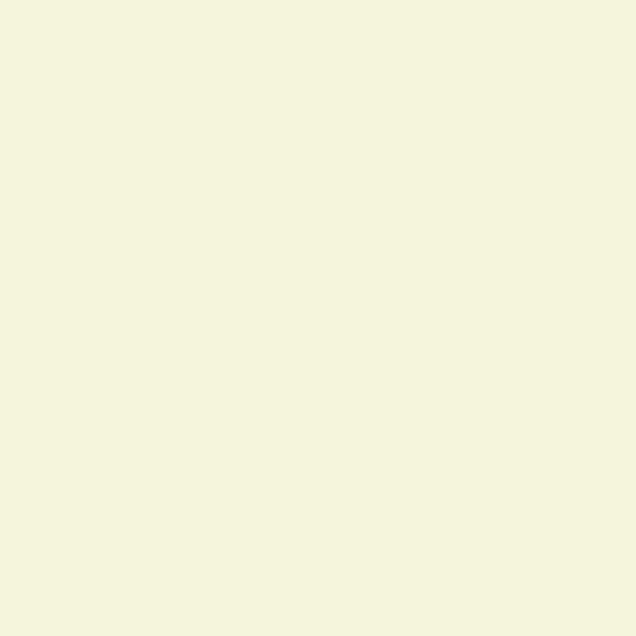

In [14]:
nodes_ = mcts.history_level_1_dict[0]['nodes']

fig, ax = p_utils.init_3d_figure(name="Level wise 1")

i = 1
mcts.rearr_action.deepcopy_scene(mcts.tree.nodes[nodes_[2*(i)+1]]['state'])


grasps = mcts.tree.nodes[nodes_[2*(i)+1]]['grasp_set']

for grasp in grasps :
    mcts.rearr_action.scene_mngr.set_gripper_pose(grasp)
    mcts.rearr_action.scene_mngr.render_axis(ax, grasp)
# #     mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    
mcts.rearr_action.scene_mngr.render_objects(ax)
p_utils.plot_basis(ax)
mcts.rearr_action.show()

In [21]:
max_value_nodes = mcts.history_level_2_dict[0]['nodes']

In [22]:
final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []
if mcts.level_wise_2_success:
    (
        pnp_all_joint_paths,
        pick_all_objects,
        place_all_object_poses,
    ) = mcts.get_all_joint_path(max_value_nodes)
    final_pnp_all_joint_paths.append(pnp_all_joint_paths)
    final_pick_all_objects.append(pick_all_objects)
    final_place_all_object_poses.append(place_all_object_poses)
    final_optimal_nodes.append(mcts.optimal_nodes)
else:
    final_pnp_all_joint_paths.append([])
    final_pick_all_objects.append([])
    final_place_all_object_poses.append([])
    final_optimal_nodes.append([])

In [23]:
from pykin.utils.kin_utils import apply_robot_to_scene

mcts.rearr_action.scene_mngr.render.render_objects(mcts.tree.nodes[0]['state'].objs)
# pick.scene_mngr.render.trimesh_scene = apply_robot_to_scene(
#         trimesh_scene=pick.scene_mngr.render.trimesh_scene, 
#         robot=pick.scene_mngr.scene.robot,
#         geom="visual"
#             )
# pick.scene_mngr.render.set_camera_view()

mcts.rearr_action.simulate_path(
    final_pnp_all_joint_paths[0],
    final_pick_all_objects[0],
    final_place_all_object_poses[0],
    is_save=True,
#     video_name="pick_rearrangement1_only_current_scene",
    video_name="benchmark3_grasp_using_contact_graspnet_consider_next_scene_block_5",
)


Visualize pc 

In [13]:
# from pytamp.utils.point_cloud_utils import get_combined_pc_from_mixed_scene
i = 0

current_node = mcts.tree.nodes[max_value_nodes[2*i + 1]]
next_node = mcts.tree.nodes[max_value_nodes[2*i + 2]]
obj_to_manipulate =current_node['action']['rearr_obj_name']

print(obj_to_manipulate)

grasps = mcts.grasp_generator.get_grasp(
    init_scene = benchmark2.init_scene,
    current_node = current_node,
    )

#next scene의 유무를 통해 combine하냐 마냐 나눠주는 함수 
# mcts.rearr_action.get_mixed_scene_on_next(
#                  next_scene=mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],\
#                  current_scene=mcts.tree.nodes[max_value_nodes[2*i+1]]['state'],\
#                  obj_to_manipulate=obj_to_manipulate
#                  )

# mcts.rearr_action.get_mixed_scene_on_current(
#                  next_scene=mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],\
#                  current_scene=mcts.tree.nodes[max_value_nodes[2*i+1]]['state'],\
#                  obj_to_manipulate=obj_to_manipulate
#                  )


# mcts.rearr_action.get_combined_pc_from_mixed_scene(
#                                                      next_scene=mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],\
#                                                      current_scene=mcts.tree.nodes[max_value_nodes[2*i]]['state'],\
#                                                      obj_to_manipulate=obj_to_manipulate
#                                                      )



goal_bottle
Extracted Region Cube Size:  0.4
Generated 17 grasps for object goal_bottle
Augment 2 y axis rotation from -pi/3 ~ pi/3 :  (102, 4, 4)
Collision free grasps step 3 :  (4, 4, 4)


In [14]:
grasps

array([[[ 0.39123743, -0.86101061,  0.32495219,  0.78987283],
        [-0.8231039 , -0.16944994,  0.54202086, -0.10434353],
        [-0.41162259, -0.47952825, -0.77499641,  1.09046544],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],

       [[ 0.36425154, -0.87123843,  0.32903572,  0.78940974],
        [-0.81235129, -0.12446442,  0.56973153, -0.10479503],
        [-0.45541873, -0.47481818, -0.75308795,  1.09836583],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],

       [[ 0.41914996, -0.83644522,  0.35309027,  0.79020202],
        [-0.88091636, -0.28053218,  0.38116673, -0.09138505],
        [-0.21977189, -0.47080901, -0.8544233 ,  1.0863887 ],
        [ 0.        ,  0.        ,  0.        ,  1.        ]],

       [[ 0.43998451,  0.85277271, -0.28141127,  0.86199652],
        [ 0.59966704, -0.51227546, -0.61479529,  0.04894622],
        [-0.66844075,  0.10174734, -0.73677295,  1.11357509],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]])

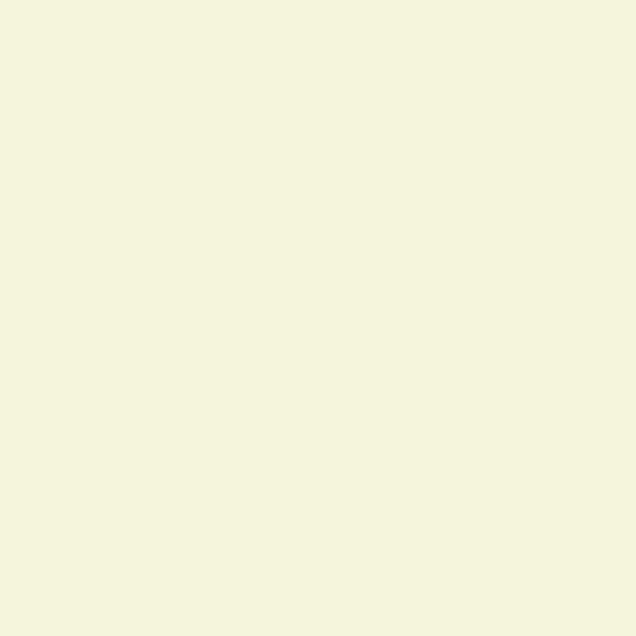

In [15]:
fig, ax = p_utils.init_3d_figure(name="Level wise 1")
mcts.rearr_action.deepcopy_scene(mcts.tree.nodes[max_value_nodes[2*(i)]]['state'])

for grasp in grasps :
    mcts.rearr_action.scene_mngr.set_gripper_pose(grasp)
    mcts.rearr_action.scene_mngr.render_axis(ax, grasp)
# #     mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    
mcts.rearr_action.scene_mngr.render_objects(ax)
p_utils.plot_basis(ax)
mcts.rearr_action.show()

In [17]:
grasps

array([[[ 0.31323362, -0.90579455,  0.2853436 ,  0.79619815],
        [-0.84088182, -0.12489285,  0.52661139, -0.09988404],
        [-0.44136436, -0.40489263, -0.80078681,  1.10741719],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]])

In [16]:
# in pc_utils
pc, pc_segments, pc_color, count = pc_utils.get_obj_point_clouds(
                            benchmark2.init_scene,
                            mcts.rearr_action.scene_mngr.scene,
                            mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']
                            )
# in pc_utils
table_point_cloud, table_color =  pc_utils.get_support_space_point_cloud(benchmark2.init_scene, benchmark2.scene_mngr.scene)

# in pc_utils
all_pc = np.vstack([pc, table_point_cloud])
all_color = np.vstack([pc_color, table_color])

# fig, ax = p_utils.init_3d_figure(name="Level wise 1")
# mcts.rearr_action.scene_mngr.render_objects(ax)
# p_utils.plot_basis(ax)
# mcts.rearr_action.show()

mcts.rearr_action.scene_mngr.scene.objs


{'shelves': Object(name=shelves, pos=[0.6 1.4 0.6]),
 'bottle_0': Object(name=bottle_0, pos=[ 0.8777323  -0.04198102  0.98560898]),
 'bottle_1': Object(name=bottle_1, pos=[ 0.96644055 -0.1786916   0.98561545]),
 'goal_bottle': Object(name=goal_bottle, pos=[ 0.82201174 -0.02377681  0.98560739]),
 'trash_bin': Object(name=trash_bin, pos=[-0.4   0.55  0.  ]),
 'rect_box': Object(name=rect_box, pos=[0.82  0.5   0.575])}

In [17]:
current_node['action']['grasp_poses'] = grasps

In [18]:
##### %matplotlib inline
import trimesh
from trimesh.util import concatenate

# table_point_cloud =  pc_utils.get_support_space_point_cloud(rearrangement1.init_scene, rearrangement1.scene_mngr.scene)
# all_pc = np.vstack([combined_pc, table_point_cloud])

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# print(obj_to_manipulate)
# print(mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name'])

#################### 
# 포인트 클라우드를 렌더링
colors = np.random.randint(0, 255, (1, 3), dtype=np.uint8)  # RGB colors (0-255)
pc_full = trimesh.points.PointCloud(all_pc,  colors=colors)
scene = trimesh.Scene(pc_full)

# Set point size and color
scene.point_size = 5.0  # Increase point size to make them more visible

# Show the scene
scene.show()

In [19]:
benchmark2.scene_mngr.scene.objs['shelves'].gparam.vertices

TrackedArray([[ 4.74256552e-03,  1.24656709e-03,  2.34621528e-03],
              [-1.09637559e-05,  7.74173788e-03,  7.94014435e-03],
              [ 1.59024712e-02, -1.14092161e-05,  7.95576800e-03],
              ...,
              [ 1.70749742e+00,  4.39992370e-01,  8.33866209e-01],
              [ 1.72920543e+00,  4.36805597e-01,  8.20537410e-01],
              [ 1.72597374e+00,  4.35399214e-01,  8.45221803e-01]])

In [20]:

T_cam= mcts.grasp_generator.T_cam

In [21]:
from pykin.utils.transform_utils import get_inverse_homogeneous

cam_pc, pc_segments = mcts.grasp_generator.get_pc_from_camera_point_of_view(all_pc, pc_segments, obj_to_manipulate)


In [22]:
import numpy as np
import trimesh

# pc_regions, _ = gg.grasp_estimator.extract_3d_cam_boxes(cam_pc[:,:3], pc_segments, min_size=0.4)
# pc_region_1 = pc_regions[obj_to_manipulate]

############
pc_region_1= mcts.grasp_generator.get_region_to_manipulate(cam_pc[:,:3], pc_segments, min_size=0.4, obj_name=obj_to_manipulate)

colors = np.random.randint(0, 255, (1, 3), dtype=np.uint8)  # RGB colors (0-255)

# Home
rand_xy = np.random.random((100,3))/100
# z = np.ones((10,1))*0.8
# rand_xy = np.hstack([rand_xy,z])
pc_region_test = trimesh.points.PointCloud(np.vstack([pc_region_1, rand_xy]),  colors=colors)

scene = trimesh.Scene(pc_region_test)

# print(pc_regions[obj_to_manipulate].shape, obj_to_manipulate)
scene.point_size=2.0
scene.show()


Extracted Region Cube Size:  0.4
